Equipe: Error 404
* Elias Nogueira
* Derek Alves
* João Pedro Nunes Magalhães 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/barrettII_eyes_clustering.xlsx')
print(df)

        ID     AL   ACD   WTW     K1     K2 Correto
0        0  23.79  3.32  12.0  43.60  44.29       S
1        1  24.60  3.39  12.3  42.03  43.95       S
2        2  24.59  3.51  12.3  42.83  43.05       S
3        3  24.04  2.96  12.0  42.35  42.83       S
4        4  24.80  2.44  12.2  41.01  41.67       S
...    ...    ...   ...   ...    ...    ...     ...
1523  1523  23.32  3.29  12.5  43.16  43.95       S
1524  1524  23.59  3.19  13.0  42.72  43.60       N
1525  1525  26.18  3.83  12.1  43.44  44.18       S
1526  1526  24.09  2.77  12.6  42.83  43.72       S
1527  1527  23.99  3.09  11.8  44.70  45.30       N

[1528 rows x 7 columns]


In [ ]:
df.isnull().sum()

ID         0
AL         0
ACD        0
WTW        0
K1         0
K2         0
Correto    0
dtype: int64

In [ ]:
df['Correto'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df.describe()

,ID,AL,ACD,WTW,K1,K2
count,1528.00000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,763.50000,23.486525,3.106728,11.975098,43.469188,44.370386
std,441.23992,1.142280,0.428881,0.431712,1.745504,1.767765
min,0.00000,20.150000,1.130000,9.900000,30.930000,33.950000
25%,381.75000,22.760000,2.830000,11.700000,42.450000,43.270000
50%,763.50000,23.360000,3.080000,12.000000,43.490000,44.290000
75%,1145.25000,24.080000,3.360000,12.300000,44.530000,45.490000
max,1527.00000,30.960000,5.230000,13.300000,49.410000,52.410000


In [ ]:
data = df

data.drop('ID', axis=1, inplace=True)
correct = data.pop('Correto')

Utilizando o Método de Elbow para escolher um número ideal de cluster.

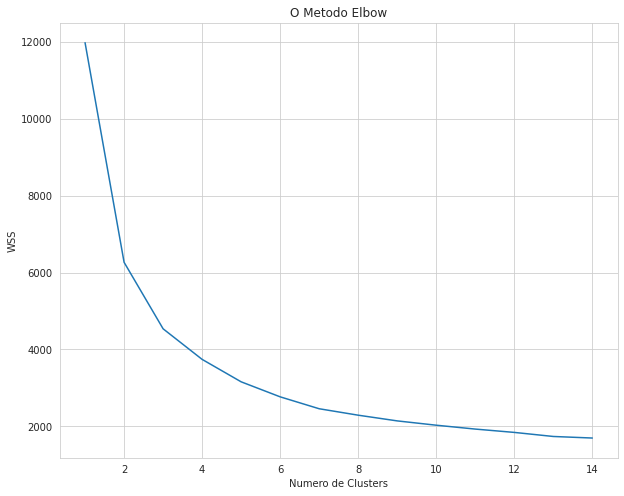

In [ ]:
wcss = []
 
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random')
    km.fit(data)
    wcss.append(km.inertia_)  

plt.figure(figsize=(10,8))
plt.plot(range(1, 15), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(
     init="random",
     n_clusters=4,
     n_init=10,
     max_iter=300,
     random_state=42
)

kmeans.fit(data)

KMeans(init='random', n_clusters=4, random_state=42)

In [ ]:
data['cluster'] = kmeans.labels_
data['Correto'] = correct
data

,AL,ACD,WTW,K1,K2,cluster,Correto
0,23.79,3.32,12.0,43.60,44.29,3,S
1,24.60,3.39,12.3,42.03,43.95,1,S
2,24.59,3.51,12.3,42.83,43.05,1,S
3,24.04,2.96,12.0,42.35,42.83,1,S
4,24.80,2.44,12.2,41.01,41.67,1,S
...,...,...,...,...,...,...,...
1523,23.32,3.29,12.5,43.16,43.95,3,S
1524,23.59,3.19,13.0,42.72,43.60,1,N
1525,26.18,3.83,12.1,43.44,44.18,1,S
1526,24.09,2.77,12.6,42.83,43.72,1,S


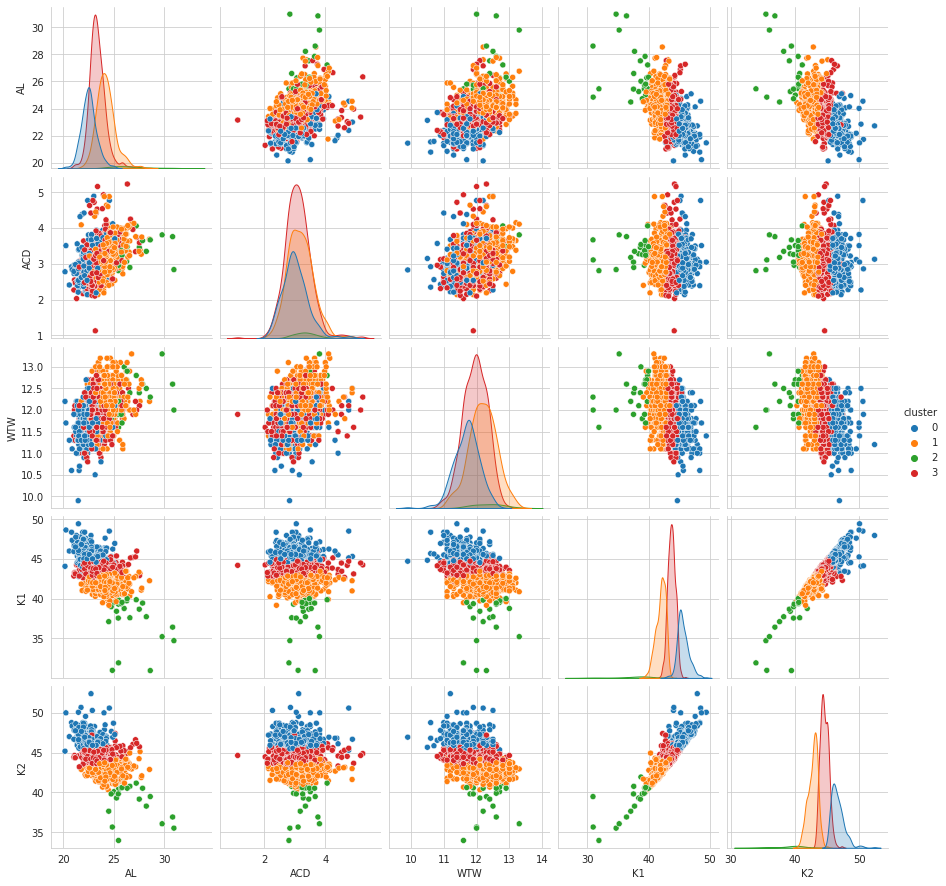

In [ ]:
sns.pairplot(data, hue='cluster', palette='tab10')

**Podemos notar uma clara separação do grupos de dados nos eixos K1 e K2 que corespondem a curvatura da córnea.**

In [ ]:
data.describe()

,AL,ACD,WTW,K1,K2,cluster
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,23.486525,3.106728,11.975098,43.469188,44.370386,1.639398
std,1.142280,0.428881,0.431712,1.745504,1.767765,1.239047
min,20.150000,1.130000,9.900000,30.930000,33.950000,0.000000
25%,22.760000,2.830000,11.700000,42.450000,43.270000,1.000000
50%,23.360000,3.080000,12.000000,43.490000,44.290000,1.000000
75%,24.080000,3.360000,12.300000,44.530000,45.490000,3.000000
max,30.960000,5.230000,13.300000,49.410000,52.410000,3.000000


In [ ]:
grupo0 = data[data['cluster'] == 0]
grupo1 = data[data['cluster'] == 1]
grupo2 = data[data['cluster'] == 2]
grupo3 = data[data['cluster'] == 3]

print(grupo0.describe(),"\n")
print(grupo1.describe(),"\n")
print(grupo2.describe(),"\n")
print(grupo3.describe(),"\n")

               AL         ACD         WTW          K1          K2  cluster
count  346.000000  346.000000  346.000000  346.000000  346.000000    346.0
mean    22.513584    3.006474   11.695087   45.604393   46.646879      0.0
std      0.755924    0.424518    0.383053    0.935827    1.017845      0.0
min     20.150000    2.140000    9.900000   42.780000   45.180000      0.0
25%     22.030000    2.742500   11.400000   45.000000   45.920000      0.0
50%     22.490000    2.970000   11.700000   45.420000   46.420000      0.0
75%     22.927500    3.250000   11.900000   46.110000   47.162500      0.0
max     25.090000    4.890000   12.700000   49.410000   52.410000      0.0 

               AL         ACD         WTW          K1          K2  cluster
count  509.000000  509.000000  509.000000  509.000000  509.000000    509.0
mean    24.182731    3.177308   12.180550   41.962515   42.784558      1.0
std      0.944574    0.420794    0.419499    0.792263    0.769714      0.0
min     21.760000    2.

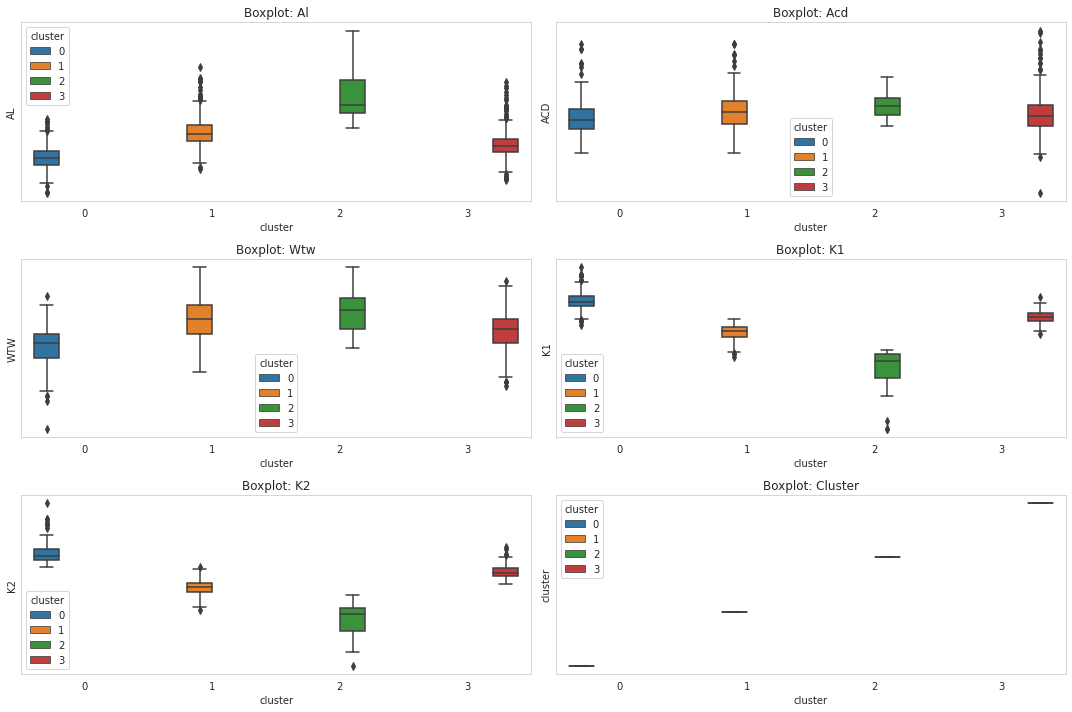

In [ ]:
cols = data.columns
cols = list(cols)
cols.remove('Correto')
data.astype({'cluster':'category'}).dtypes


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    col = cols[i]
    sns.boxplot(x='cluster', y=col, hue="cluster", data = data, ax = ax)
    ax.set_title(f"Boxplot: {col.capitalize()}")
plt.tight_layout()
plt.show()

In [ ]:
c0 = [0,0]
c1 = [0,0]
c2 = [0,0]
c3 = [0,0]

for i in range(len(data)):

  if data['cluster'][i] == 0: 
    c0[0] += 1
    if data['Correto'][i] == 'S':
        c0[1] += 1
  elif data['cluster'][i] == 1:
    c1[0] += 1
    if data['Correto'][i] == 'S':
        c1[1] += 1
  elif data['cluster'][i] == 2:
    c2[0] += 1
    if data['Correto'][i] == 'S':
        c2[1] += 1
  elif data['cluster'][i] == 3:
    c3[0] += 1
    if data['Correto'][i] == 'S':
        c3[1] += 1

print(f"Grupo 1 - Total = {c0[0]}, Frequência de Sim = {(c0[1]/c0[0])*100}")
print(f"Grupo 2 - Total = {c1[0]}, Frequência de Sim = {(c1[1]/c1[0])*100} ")
print(f"Grupo 3 - Total = {c2[0]}, Frequência de Sim = {(c2[1]/c2[0])*100}")
print(f"Grupo 4 - Total = {c3[0]}, Frequência de Sim = {(c3[1]/c2[0])*100}")

Grupo 1 - Total = 346, Frequência de Sim = 69.65317919075144
Grupo 2 - Total = 509, Frequência de Sim = 71.51277013752456 
Grupo 3 - Total = 23, Frequência de Sim = 52.17391304347826
Grupo 4 - Total = 650, Frequência de Sim = 2021.7391304347825
